# Week05 Decision Trees, K-Nearest Neighbor, SVM

- **Student ID** : 학번
- **Name** : 이름

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week05_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week03\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

# 1. Decision Tree Learning with Scikit-learn

### Sample dataset - 2D
- Task: predicting $ x_{0}, x_{1} \rightarrow y$ (0 or 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([[1, 1], 
                    [1, 3], 
                    [3, 1], 
                    [3, 3]])
y_train = np.array([0, 0, 0, 1])

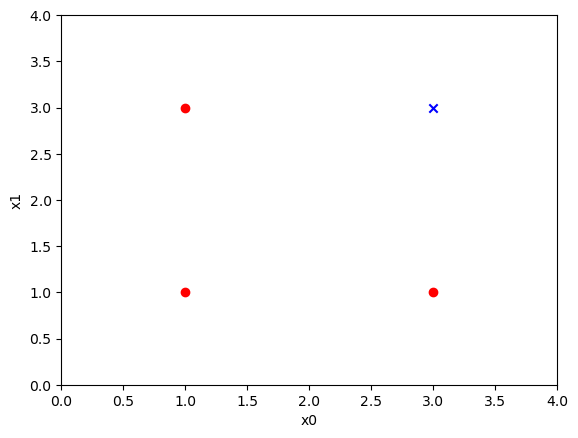

In [2]:
# plot the data points in feature space (x0, x1 plane)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o', c='red')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='x', c='blue')

plt.axis([0, 4, 0, 4])
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

### Logistic regression model 
- model : $y = sigmoid(\mathbf{x \cdot w} + b) = sigmoid(w_{0} x_{0} + w_{1} x_{1} + b)$

In [3]:
from sklearn.linear_model import LogisticRegression

# training the logistic regression model. C=100
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

LogisticRegression(C=100)

In [4]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

### Decision boundary of logistic regression
- use plot_decision_regions function 

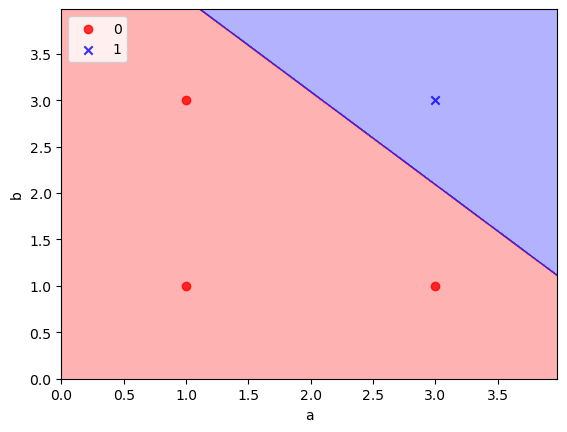

In [5]:
#plot_decision_boundary
plot_decision_regions(X_train, y_train, classifier = lr)

plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')
#plt.tight_layout()
plt.show()

### Decision tree model 

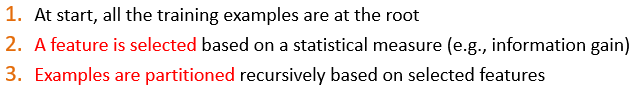
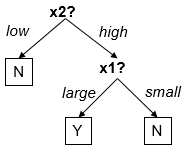
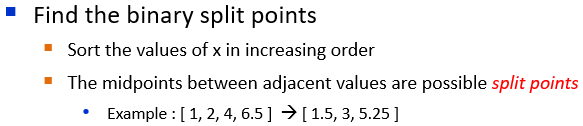
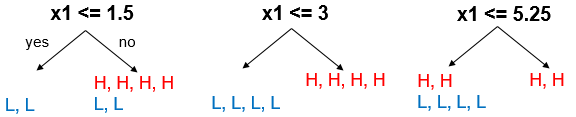

In [6]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree with training dataset
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

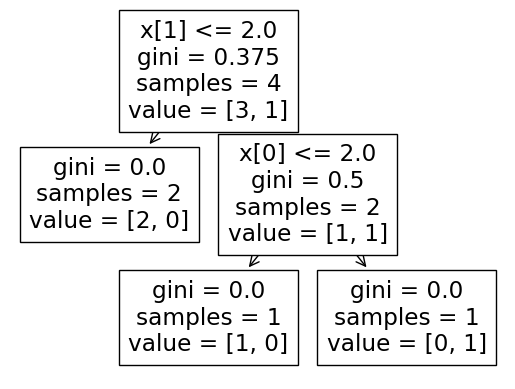

In [7]:
from sklearn.tree import plot_tree #scikit-learn >= 22.0

# plot the tree
plot_tree(tree)
plt.show()

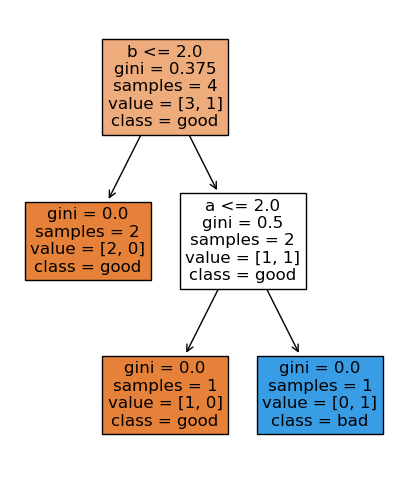

In [8]:
# plot the tree in better style
# size of figure to width 5, height 6
# show feature_names 'a', 'b' and class_names 'good', 'bad', filled with color, font size 12
plt.figure(figsize=(5, 6))

fnames = ['a', 'b']
cnames = ['good', 'bad']
plot_tree(tree, feature_names=fnames, class_names=cnames, filled=True, fontsize=12)
plt.show()

### Decision boundary of decision tree model
- use plot_decision_regions function 

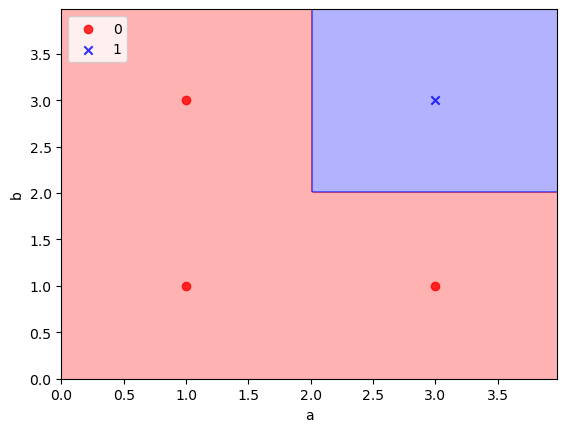

In [9]:
#plot_decision_boundary
plot_decision_regions(X_train, y_train, classifier=tree)

plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')
plt.show()

---

### Load Iris Dataset - binary classification

In [10]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [11]:
from sklearn.model_selection import train_test_split

# train test split. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [12]:
# check the shape of training and test data
print(X_train.shape)
print(X_test.shape)

(105, 2)
(45, 2)


### Plotting the training data

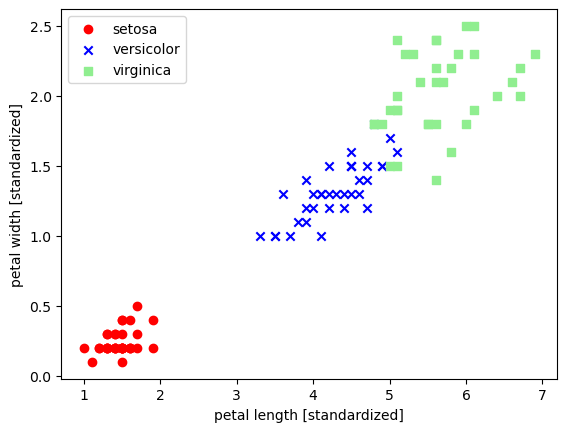

In [13]:
# plotting data for class 0, 1, 2
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1],
            color='lightgreen', marker='s', label='virginica')

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Entropy and Gini Impurity

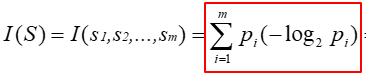
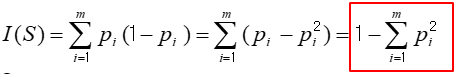

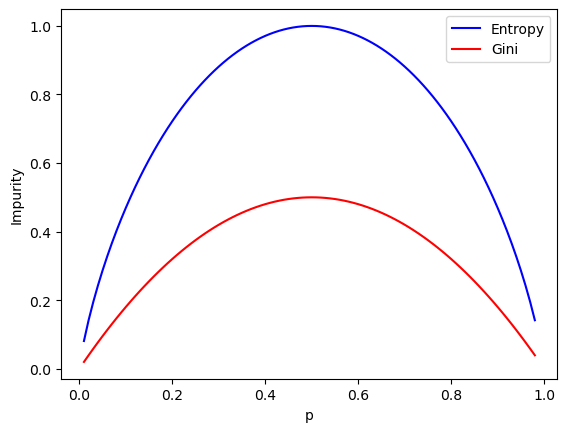

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# compute Entropy for class 0, 1 with Prob(class=1) = p
def entropy(p):
    return p * (-np.log2(p)) + (1 - p) * (-np.log2(1 - p))

# compute Gini for class 0, 1 with Prob(class=1) = p
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

p = np.arange(0.01, 0.99, 0.01)
plt.plot(p, entropy(p), label='Entropy', color='blue')
plt.plot(p, gini(p), label='Gini', color='red')

plt.xlabel('p')
plt.ylabel('Impurity')
plt.legend()
plt.show()

### Learning Decision Tree 

In [15]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree with training dataset. use 'gini'
tree = DecisionTreeClassifier(criterion='gini', random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Plotting decision boundary
- use plot_decision_regions function 

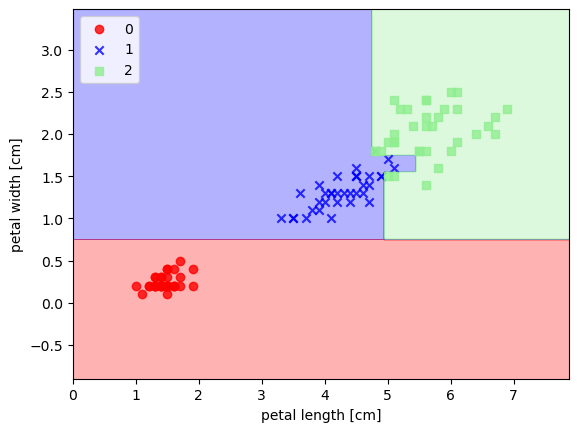

In [16]:
#plot_decision_boundary
plot_decision_regions(X_train, y_train, classifier=tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Visualizing the model

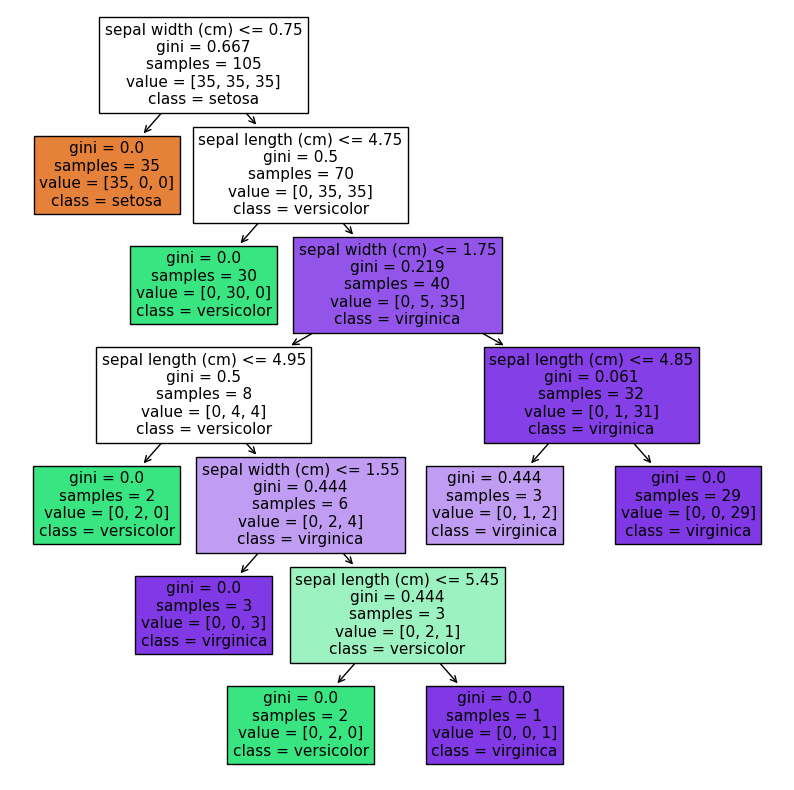

In [17]:
from sklearn.tree import plot_tree #scikit-learn >= 22.0

# plot the tree
# use iris.feature_names and iris.target_names
plt.figure(figsize=(10,10))

plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=11)
plt.show()

### Model evaluation

In [18]:
# train and test accuracy of the model. use .score(X, y)
acc = tree.score(X_train, y_train)
print("Train Accuracy : ", acc)
acc = tree.score(X_test, y_test)
print("Test Accuracy : ", acc)

Train Accuracy :  0.9904761904761905
Test Accuracy :  0.9777777777777777


### Prediction of class labels

In [19]:
# predicting labels of first 5 test dataset
y_pred = tree.predict(X_test)

print('True test labels :', y_test[:5])
print('Predicted labels :', y_pred[:5])

True test labels : [2 0 0 2 1]
Predicted labels : [2 0 0 1 1]


---

### Building Decision Tree with max depth

In [20]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree of depth 2
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

### Plotting decision boundary
- use plot_decision_regions function 

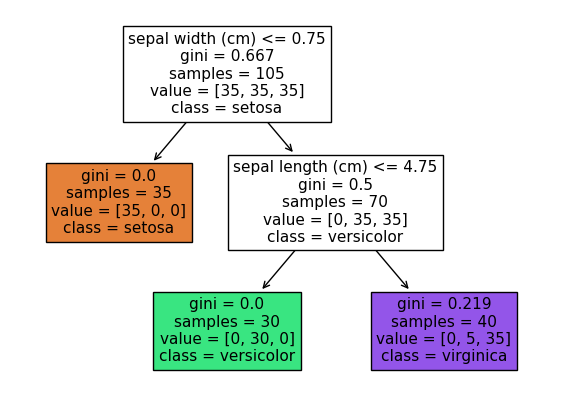

In [21]:
# plot the tree
plt.figure(figsize=(7, 5))

plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=11)
plt.show()

### Plotting the decision boundary

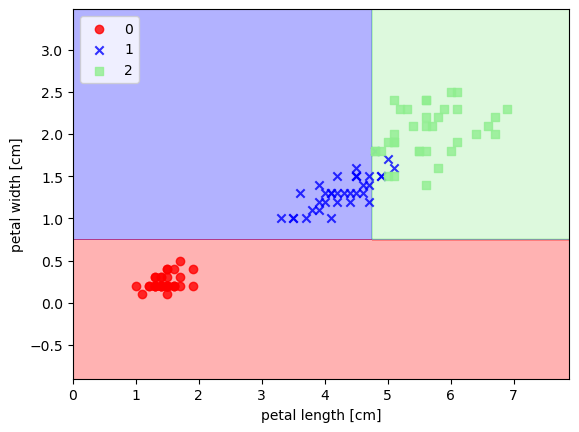

In [22]:
#plot_decision_boundary
plot_decision_regions(X_train, y_train, classifier=tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Model evaluation

In [23]:
# train and test accuracy of the model. use .score(X, y)
acc = tree.score(X_train, y_train)
print("Train Accuracy : ", acc)
acc = tree.score(X_test, y_test)
print("Test Accuracy : ", acc)

Train Accuracy :  0.9523809523809523
Test Accuracy :  0.9555555555555556


---


### Random Forest

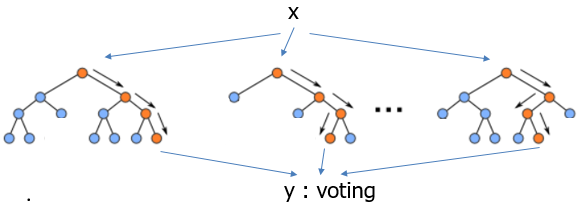

In [24]:
from sklearn.ensemble import RandomForestClassifier

# learn forest of 100 decision trees of depth 2
forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, max_features='sqrt', random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=1)

### Plotting decision boundary
- use plot_decision_regions function 

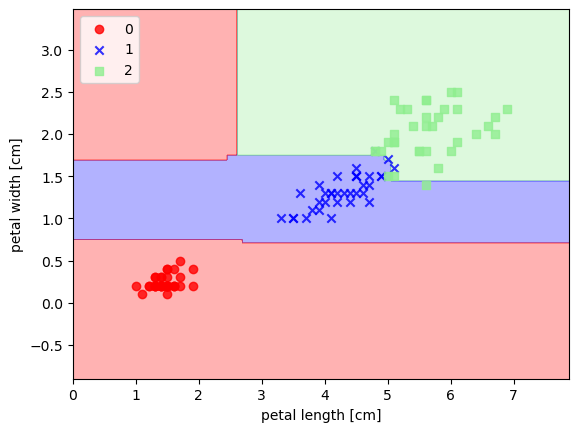

In [25]:
#plot_decision_boundary
plot_decision_regions(X_train, y_train, classifier=forest)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Model evaluation

In [26]:
# train and test accuracy of the model. use .score(X, y)
acc = forest.score(X_train, y_train)
print("Train Accuracy : ", acc)

acc = forest.score(X_test, y_test)
print("Test Accuracy : ", acc)

Train Accuracy :  0.9523809523809523
Test Accuracy :  0.9777777777777777


---

# 2. K-Nearest Neighbors using Scikit-learn

### Sample dataset - 2D
- Task: predicting $ x_{0}, x_{1} \rightarrow y$ (0 or 1)

In [27]:
X_train = np.array([[1, 1], 
                    [1, 3], 
                    [3, 1], 
                    [3, 3]])
y_train = np.array([0, 0, 0, 1])

### Building a K-Nearest Neighbor Classifier

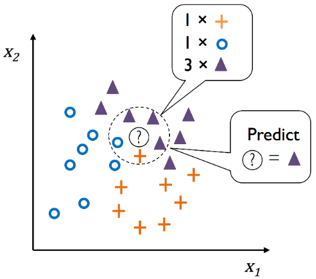
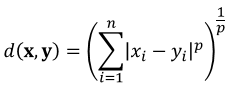

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# learn the k Nearest Neighbor classifier. k = 1, p = 2. 
knn = KNeighborsClassifier(n_neighbors=1, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Plotting decision boundary
- use plot_decision_regions function 

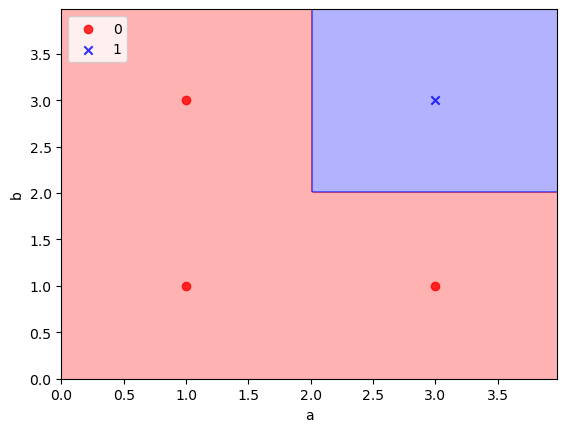

In [29]:
#plot_decision_boundary
plot_decision_regions(X_train, y_train, classifier=knn)

plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')
plt.show()

### More sample dataset - 2D

In [30]:
X_train = np.array([[1, 1], 
                    [1, 3], 
                    [3, 1], 
                    [3, 3],
                    [2, 3],
                    [2, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

### Building a K-Nearest Neighbor Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# learn the k Nearest Neighbor classifier. k = 1, p = 2. 
knn = KNeighborsClassifier(n_neighbors=1, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Plotting the decision boundary

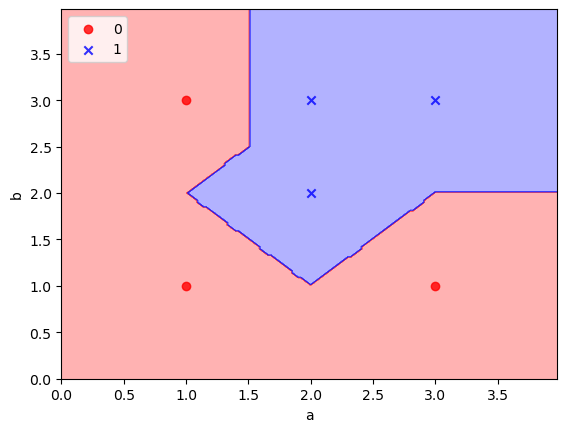

In [32]:
plot_decision_regions(X_train, y_train, classifier=knn)

plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')
plt.show()

---

### Load Iris Dataset - binary classification

In [33]:
from sklearn import datasets

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [34]:
from sklearn.model_selection import train_test_split

# train test split. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Standardize the dataset

In [35]:
from sklearn.preprocessing import StandardScaler

# standardizing X_train
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train[:5])
print(X_train_std[:5])

[[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]]
[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]]


### Building a K-Nearest Neighbor Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# learn the k Nearest Neighbor classifier.k = 3, p = 2. 
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

### Plotting decision boundary
- use plot_decision_regions function 

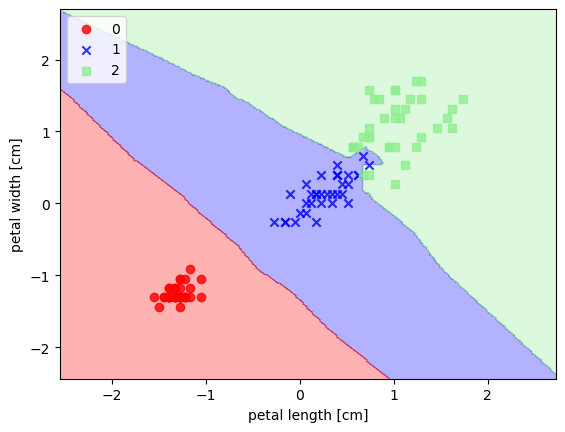

In [37]:
#plot_decision_boundary
plot_decision_regions(X_train_std, y_train, classifier=knn)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Model evaluation

In [38]:
# train and test accuracy of the model. use .score(X, y)
acc = knn.score(X_train_std, y_train)
print("Train Accuracy : ", acc)
acc = knn.score(X_test_std, y_test)
print("Test Accuracy : ", acc)

Train Accuracy :  0.9904761904761905
Test Accuracy :  0.9777777777777777


### Try other k values

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# learn the k Nearest Neighbor classifier. k = 9, p = 2. 
knn = KNeighborsClassifier(n_neighbors=9, p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=9)

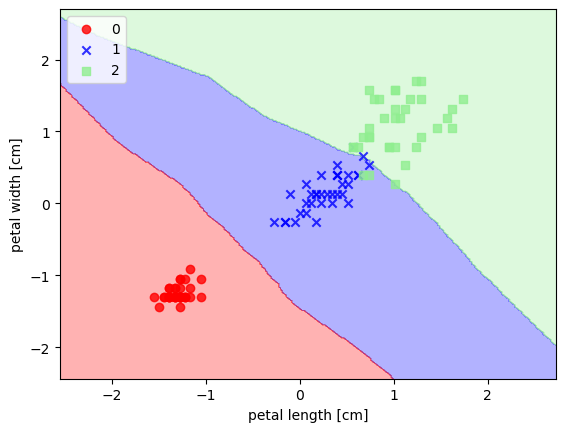

In [40]:
#plot_decision_boundary
plot_decision_regions(X_train_std, y_train, classifier=knn)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [41]:
# train and test accuracy of the model. use .score(X, y)
acc = knn.score(X_train_std, y_train)
print("Train Accuracy : ", acc)
acc = knn.score(X_test_std, y_test)
print("Test Accuracy : ", acc)

Train Accuracy :  0.9523809523809523
Test Accuracy :  0.9777777777777777


---

# 3. Support Vector Machine (SVM)

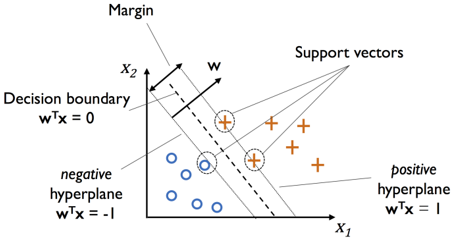

### Sample dataset - 2D

In [42]:
X_train = np.array([[1, 1], 
                    [1, 3], 
                    [3, 1], 
                    [3, 3],
                    [2, 3],
                    [2, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

### Training a SVM - Polynomial kernel

In [43]:
from sklearn.svm import SVC

# learn SVM model. use polynomial kernel, gamma=0.2, C=100 
svm = SVC(kernel='poly', random_state=1, gamma=0.2, C=100.0)
svm.fit(X_train, y_train)

SVC(C=100.0, gamma=0.2, kernel='poly', random_state=1)

### Plotting decision boundary
- use plot_decision_regions function 

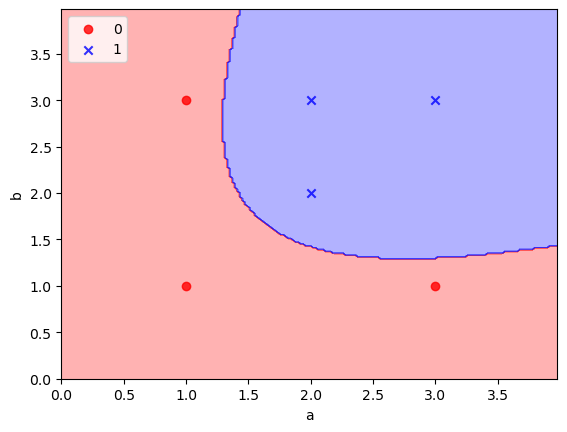

In [44]:
# plot decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=svm)

plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')
plt.show()

### Sample dataset - circular decision boundary

In [45]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=0)

print(X[:5])
print(y[:5])

[[-0.7566868   0.75999978]
 [ 0.11021955  0.08793658]
 [ 0.44244461  0.38644098]
 [ 0.03151342 -0.47166359]
 [ 0.35824708 -0.9698165 ]]
[0 1 1 1 1]


### Plotting the training data

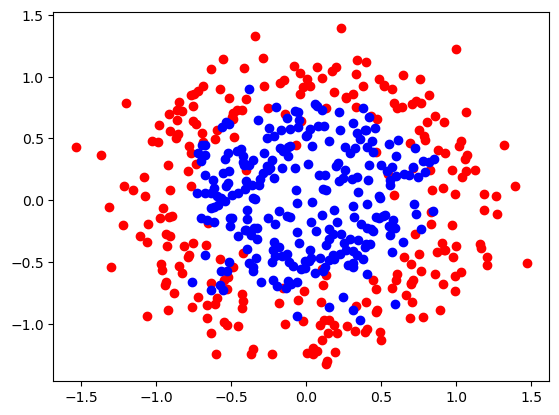

In [46]:
# plotting data 
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue')

plt.show()

### Splitting data into 70% training data & 30% test data

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Training a SVM - Gaussian Radial Basis Function (RBF) kernel

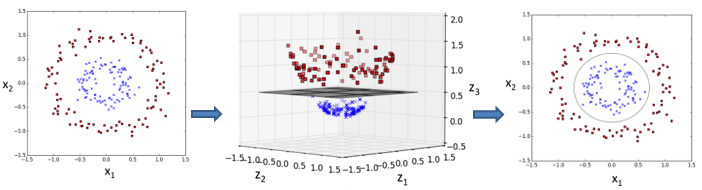
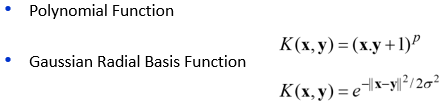

In [48]:
from sklearn.svm import SVC

# learn SVM model. use rbf kernel, gamma=0.2, C=100, rbf kernel
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=100.0)
svm.fit(X_train, y_train)

SVC(C=100.0, gamma=0.2, random_state=1)

### Plotting decision boundary
- use plot_decision_regions function 

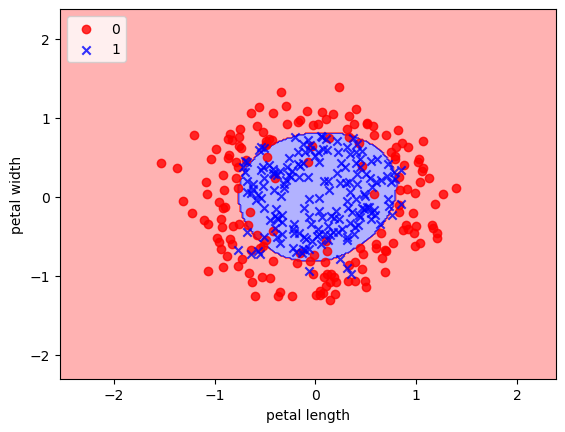

In [49]:
# plot decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=svm)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [50]:
# Train accuracy
acc = svm.score(X_train, y_train)
print("Train accuracy : %.4f" % acc)# Test accuracy
acc = svm.score(X_test, y_test)
print("Test accuracy : %.4f" % acc)

Train accuracy : 0.8943
Test accuracy : 0.9200


---

# Quiz 1 : Decision Tree 

## Learn decision tree model for Heart Diseases classification using heart_disease.csv dataset
- **Dataset information** : https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Use all 297 samples, all 13 features
- Label : The feature 'num' refers to the presence of heart disease in the patient(from 0 to 4). We will convert values 2, 3, 4 to 1(to do binary classification)
- Use 70% of dataset for training, 30% for testing
- Find the smallest tree among the trees that show highest test accuracy (try various max_depth)
- Visualize the tree, and compute the accuracies
- Predict the class of following data
            [[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]]
- Learn random forest and compare the accuracy with the decision tree

### Loading Heart Disease Dataset

In [79]:
import pandas as pd
import numpy as np

hd = pd.read_csv('heart_disease.csv')

In [80]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [81]:
# set num values to 0 and 1 (if it is > 0)
hd['num'] = np.where(hd['num'] > 0, 1, 0)
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [82]:
# Make X, y using all features
X = hd.iloc[:, 0:13].values
y = hd['num'].astype(np.int32) # type cast

print('Shape of X:', X.shape)
print('Class labels:', np.unique(y))

Shape of X: (297, 13)
Class labels: [0 1]


### Splitting data 

In [83]:
from sklearn.model_selection import train_test_split

# train test split. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Learning Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree with training dataset. try various depth of tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### Visualizing the model

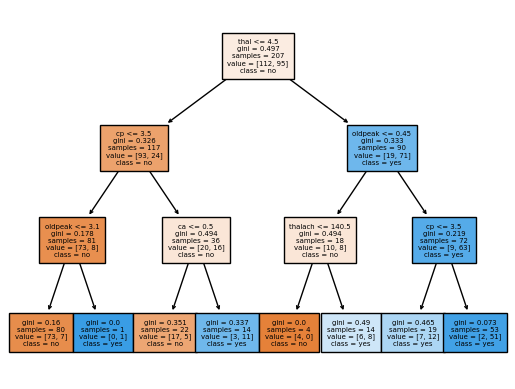

In [95]:
from sklearn.tree import plot_tree

# plot the tree
# use hd.columns for feature names and ['no', 'yes'] for class names
cnames = ['no', 'yes']
plot_tree(tree, feature_names=hd.columns, class_names=cnames, filled=True, fontsize=5)

plt.show()

### Model evaluation

In [96]:
# train and test accuracy of the model. use .score(X, y)
print(f"Train Accuracy : {tree.score(X_train, y_train)}")
print(f"Test Accuracy : {tree.score(X_test, y_test)}")

Train Accuracy : 0.855072463768116
Test Accuracy : 0.7444444444444445


### Classification of new data

In [59]:
new_data = np.array([[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]])
print('New data = ', new_data)

# predict class of new data
y_pred = tree.predict(new_data)
print("Prediction is class %d" % y_pred)

New data =  [[ 52   2   5 135 250   0   3 180   1   0   1   0   2]]
Prediction is class 0


### Learning Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

# learn forest of 100 decision trees of depth 3
forest = RandomForestClassifier(n_estimators=100, max_depth=3, criterion='gini', max_features='sqrt', random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

### Model evaluation

In [98]:
# train and test accuracy of the model. use .score(X, y)
print(f"Train Accuracy : {forest.score(X_train, y_train)}")
print(f"Test Accuracy : {forest.score(X_test, y_test)}")

Train Accuracy : 0.8695652173913043
Test Accuracy : 0.8555555555555555


# Quiz 2 : k-NN Classifier
## Learn k-NN Classifier using heart_disease.csv dataset
- **Dataset information** : https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Use the same training and test dataset of Quiz 1
- Learn k-NN classifier with k = 5, p = 2
- Compute the accuracies of the classifier
-
- Learn k-NN classifier again after standardize the data
- Compute the accuracies of the classifier
-
- Find the best k that shows highest test accuracy (try various n_neighbors)
- Compute the accuracies of the classifier

### Building a K-Nearest Neighbor Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

# learn the k Nearest Neighbor classifier. k = 5. p = 2. 
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Model evaluation

In [63]:
# train and test accuracy of the model. use .score(X, y)
print(f"Train Accuracy : {knn.score(X_train, y_train)}")
print(f"Test Accuracy : {knn.score(X_test, y_test)}")

Train Accuracy : 0.7681159420289855
Test Accuracy : 0.6111111111111112


### Standardize the dataset

In [64]:
from sklearn.preprocessing import StandardScaler

# standardizing X_train
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building a K-Nearest Neighbor Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# learn the k Nearest Neighbor classifier. try various values of k.
knn = KNeighborsClassifier(n_neighbors = 9, p = 2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=9)

### Model evaluation

In [66]:
# train and test accuracy of the model. use .score(X, y)
print(f"Train Accuracy : {knn.score(X_train_std, y_train)}")
print(f"Test Accuracy : {knn.score(X_test_std, y_test)}")

Train Accuracy : 0.8647342995169082
Test Accuracy : 0.8666666666666667


### Classification of new data

In [67]:
# predict class 
new_data = np.array([[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]])
print('New data = ', new_data)

y_pred = knn.predict(new_data)
print("Prediction is class %d" % y_pred)

New data =  [[ 52   2   5 135 250   0   3 180   1   0   1   0   2]]
Prediction is class 0


# Quiz 3 : Compare non-linear decision boundaries
## For make_moons dataset, train following models, and show the decision boundary of each learned model
- Use the sklearn.datasets.make_moons to generate 500 taining data with noise=0.3
- Learn logistic regression model (C=100)
- Learn decision tree (max_depth=4)
- Learn k-Nearest Neighbor (k = 7)
- Learn SVM (kernel='rbf', gamma=0.2, C=1.0)
-
- Compare the decision boundaries by using plot_decision_regions()

### Generate dataset with make_moons()

In [68]:
from sklearn.datasets import make_moons

# generate dataset using make_moons()
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)

### Splitting data

In [69]:
# train test split. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### plot the data

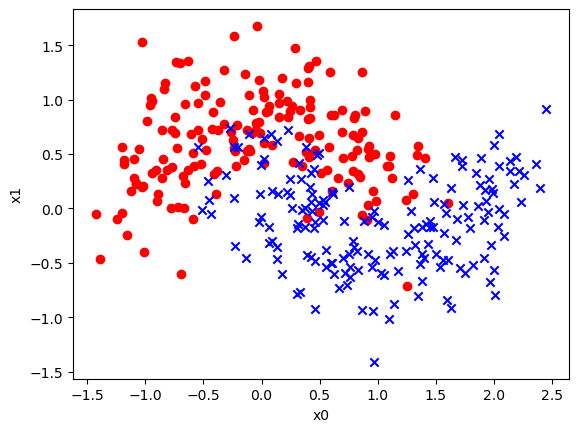

In [70]:
# plot the data points in feature space (x0, x1 plane)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color = 'red', marker='o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color = 'blue', marker='x')

plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

# training the logistic regression with C=100
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

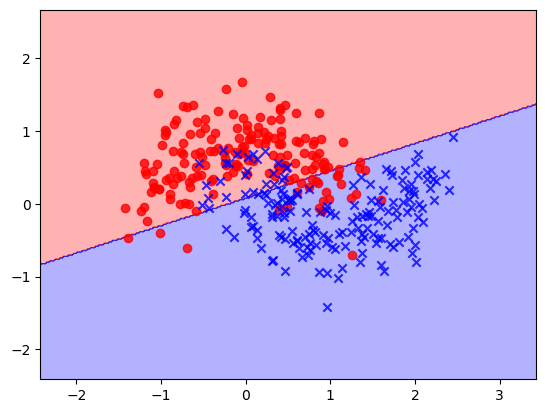

In [72]:
# plot decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=lr)
plt.show()

### Decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree with depth 4 
tree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

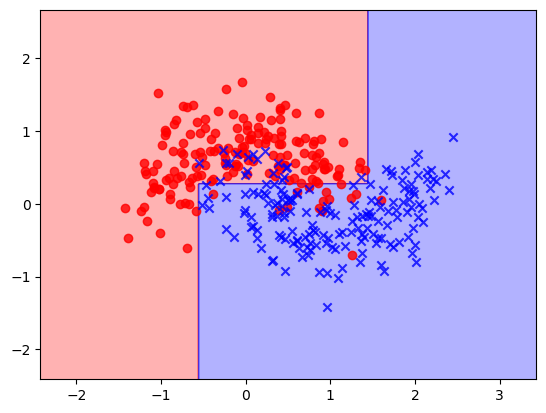

In [74]:
# plot decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=tree)
plt.show()

### K-Nearest Neighbor

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# learn the k Nearest Neighbor classifier with k = 5 
knn = KNeighborsClassifier(n_neighbors=5, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

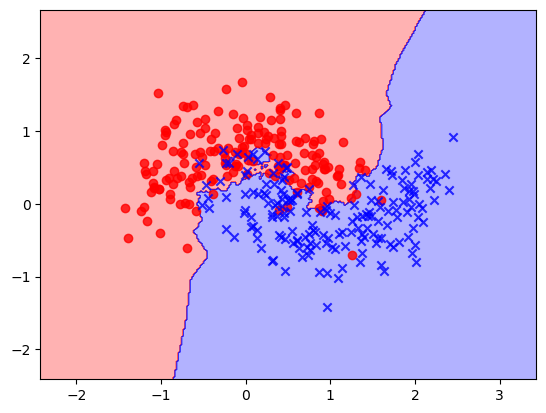

In [76]:
# plot decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=knn)
plt.show()

### SVM

In [77]:
from sklearn.svm import SVC

# learn SVM model. use rbf kernel, gamma=0.2, C=1
svm = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1)
svm.fit(X_train, y_train)

SVC(gamma=0.2, random_state=1)

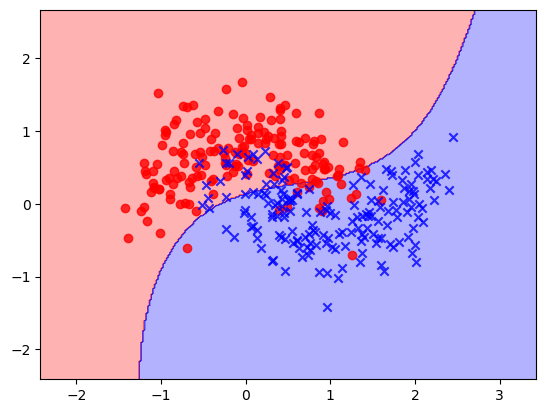

In [78]:
# plot decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=svm)
plt.show()